# Spotify Analyzer & Songs Recommendation System

### Daniel Truong

## Import library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Explore Datasets

In [2]:
spotify_df = pd.read_excel("Spotify Songs.xlsx")
spotify_df.head()

,Unnamed: 0,title,artist,top genre,year,loudness,energy,liveness,valence,dur,acousticness,speechiness,pop
0,0,God's Plan,Drake,"['canadian hip hop', 'canadian pop', 'hip hop'...",2018,-9.211,0.449,0.552,0.357,199,0.0332,0.1090,82
1,1,Perfect,Ed Sheeran,"['pop', 'uk pop']",2017,-6.312,0.448,0.106,0.168,263,0.1630,0.0232,85
2,2,Meant to Be (feat. Florida Georgia Line),Bebe Rexha,"['dance pop', 'electropop', 'pop', 'post-teen ...",2017,-6.458,0.783,0.083,0.579,164,0.0470,0.0856,75
3,3,Havana (feat. Young Thug),Camila Cabello,"['dance pop', 'pop', 'post-teen pop']",2018,-4.333,0.523,0.132,0.394,217,0.1840,0.0300,80
4,4,rockstar (feat. 21 Savage),Post Malone,"['dfw rap', 'melodic rap', 'rap']",2018,-6.136,0.520,0.131,0.129,218,0.1240,0.0712,84


In [3]:
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384 entries, 0 to 383
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    384 non-null    int64  
 1   title         384 non-null    object 
 2   artist        384 non-null    object 
 3   top genre     384 non-null    object 
 4   year          384 non-null    int64  
 5   loudness      384 non-null    float64
 6   energy        384 non-null    float64
 7   liveness      384 non-null    float64
 8   valence       384 non-null    float64
 9   dur           384 non-null    int64  
 10  acousticness  384 non-null    float64
 11  speechiness   384 non-null    float64
 12  pop           384 non-null    int64  
dtypes: float64(6), int64(4), object(3)
memory usage: 39.1+ KB


## Data Preprocessing

In [4]:
spotify_df = spotify_df.drop('Unnamed: 0',axis=1)

In [5]:
#Check if there are any missing data
spotify_df.isnull().sum()

title           0
artist          0
top genre       0
year            0
loudness        0
energy          0
liveness        0
valence         0
dur             0
acousticness    0
speechiness     0
pop             0
dtype: int64

In [6]:
spotify_df.head()

,title,artist,top genre,year,loudness,energy,liveness,valence,dur,acousticness,speechiness,pop
0,God's Plan,Drake,"['canadian hip hop', 'canadian pop', 'hip hop'...",2018,-9.211,0.449,0.552,0.357,199,0.0332,0.1090,82
1,Perfect,Ed Sheeran,"['pop', 'uk pop']",2017,-6.312,0.448,0.106,0.168,263,0.1630,0.0232,85
2,Meant to Be (feat. Florida Georgia Line),Bebe Rexha,"['dance pop', 'electropop', 'pop', 'post-teen ...",2017,-6.458,0.783,0.083,0.579,164,0.0470,0.0856,75
3,Havana (feat. Young Thug),Camila Cabello,"['dance pop', 'pop', 'post-teen pop']",2018,-4.333,0.523,0.132,0.394,217,0.1840,0.0300,80
4,rockstar (feat. 21 Savage),Post Malone,"['dfw rap', 'melodic rap', 'rap']",2018,-6.136,0.520,0.131,0.129,218,0.1240,0.0712,84


In [7]:
# Drop duplicate songs
spotify_df.drop_duplicates(subset ="title",keep = False, inplace = True)

In [8]:
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 384 entries, 0 to 383
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         384 non-null    object 
 1   artist        384 non-null    object 
 2   top genre     384 non-null    object 
 3   year          384 non-null    int64  
 4   loudness      384 non-null    float64
 5   energy        384 non-null    float64
 6   liveness      384 non-null    float64
 7   valence       384 non-null    float64
 8   dur           384 non-null    int64  
 9   acousticness  384 non-null    float64
 10  speechiness   384 non-null    float64
 11  pop           384 non-null    int64  
dtypes: float64(6), int64(3), object(3)
memory usage: 39.0+ KB


In [114]:
spotify_df.to_excel("Spotify Songs.xlsx",sheet_name="Sheet 1")

# 1) Analyze Hot Songs from 2017 - 2022

> Note: Some songs are from before 2017 because they're popular during 2017 - 2022 year range

## Trends

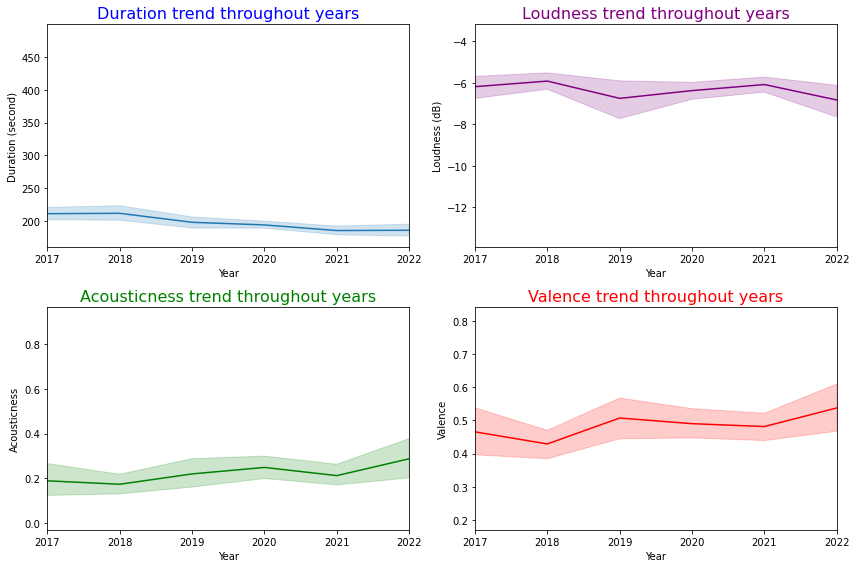

In [9]:
fig,axes = plt.subplots(nrows=2,ncols=2,figsize=(12,8))
#Duration trend
sns.lineplot(data=spotify_df,x="year",y="dur",ax=axes[0][0]);
axes[0][0].set_xlim(2017,2022)
axes[0][0].set_ylabel("Duration (second)")
axes[0][0].set_xlabel("Year")
axes[0][0].set_title("Duration trend throughout years", fontsize=16,color="blue")

#Loundness trend
sns.lineplot(data=spotify_df,x="year",y="loudness",ax=axes[0][1],color="purple")
axes[0][1].set_xlim(2017,2022)
axes[0][1].set_ylabel("Loudness (dB)")
axes[0][1].set_xlabel("Year")
axes[0][1].set_title("Loudness trend throughout years", fontsize=16,color="purple")

#Acousticness trend
sns.lineplot(data=spotify_df,x="year",y="acousticness",ax=axes[1][0],color="green")
axes[1][0].set_xlim(2017,2022)
axes[1][0].set_ylabel("Acousticness")
axes[1][0].set_xlabel("Year")
axes[1][0].set_title("Acousticness trend throughout years", fontsize=16,color="green")

#Valence trend
sns.lineplot(data=spotify_df,x="year",y="valence",ax=axes[1][1],color="red")
axes[1][1].set_xlim(2017,2022)
axes[1][1].set_ylabel("Valence")
axes[1][1].set_xlabel("Year")
axes[1][1].set_title("Valence trend throughout years", fontsize=16,color="red")

plt.tight_layout()

### **Songs apparently become shorter, less louder,more acoustic, more valence (happier) throughout the years**

# Song Features Correlations

<AxesSubplot:title={'center':'Correlations between features'}>

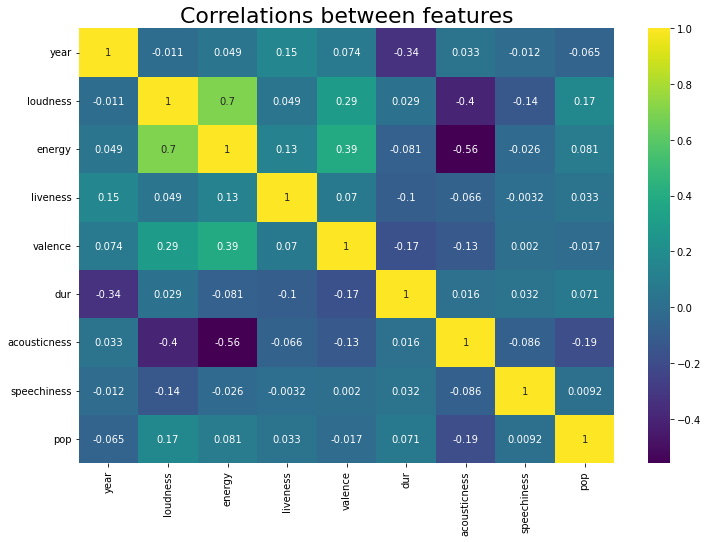

In [149]:
plt.figure(figsize=(12,8))
plt.title("Correlations between features",fontsize=22)
sns.heatmap(spotify_df.corr(),annot=True,cmap="viridis")

## Are shorter songs more popular?

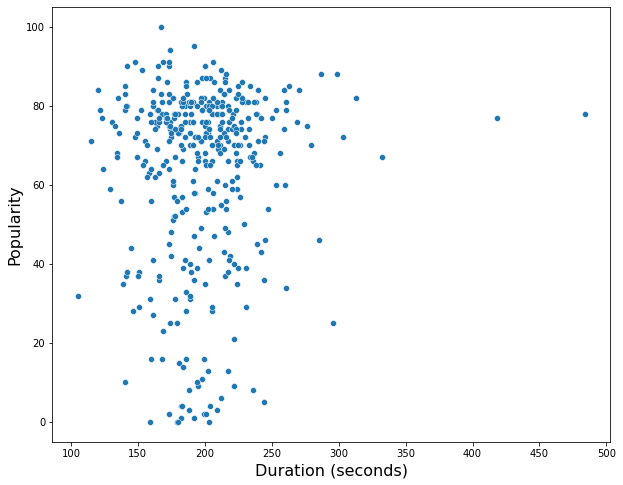

In [152]:
plt.figure(figsize=(10,8))
plt.xlabel("Duration (seconds)",fontsize=16)
plt.ylabel("Popularity",fontsize=16)
sns.scatterplot(x="dur",y="pop",data=spotify_df);

### *Most popular songs have duration about 200 seconds or 3.3 minutes*

# Top 10 Artists number of songs released

In [153]:
spotify_df.value_counts("artist")[:10]

artist
Ed Sheeran         8
Imagine Dragons    7
Drake              7
The Weeknd         7
Justin Bieber      6
Post Malone        6
Camila Cabello     6
Lil Baby           6
Dua Lipa           6
Cardi B            5
dtype: int64

# Numbers of songs each year

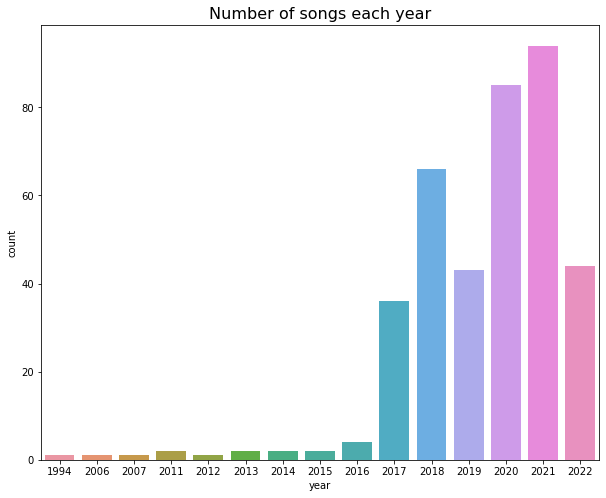

In [154]:
plt.figure(figsize=(10,8))
plt.title("Number of songs each year",fontsize=16)
sns.countplot(data=spotify_df,x='year');

# Most popular song each year

In [12]:
spotify_df_by_years = spotify_df.loc[spotify_df.groupby(['year'])['pop'].idxmax()]
spotify_df_by_years = spotify_df_by_years.set_index('year')
spotify_df_by_years[['title','artist']]

,title,artist
year,,
1994,All I Want for Christmas Is You,Mariah Carey
2006,"Sorry, Blame It On Me",Akon
2007,I Use What I Got,Jason Aldean
2011,Someone Like You,Adele
2012,Good Old Days,P!nk
2013,All of Me,John Legend
2014,Photograph,Ed Sheeran
2015,One Call Away - Acoustic,Charlie Puth
2016,Let Me Love You,DJ Snake


# 2) Spotify Recommendation System

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import spotipy
import pprint
from spotipy.oauth2 import SpotifyClientCredentials

## Personal Spotify Datasets

In [65]:
client_credentials_manager = SpotifyClientCredentials(client_id="", client_secret="")
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

In [66]:
results = sp.playlist("https://open.spotify.com/playlist/2QFZ21dpDz5Z9ufKJGBOsf")
pp = pprint.PrettyPrinter(indent=4)

tracks = results["tracks"]["items"]
song_arr = []

track_arr = []
track_uri_arr = []
artist_arr = []
features = []


for track in tracks:
    #Track URI:
    track_uri = track["track"]["uri"]
    feature = sp.audio_features(track_uri)
    feature_dict = feature[0]
    
    #Track name:
    track_name = track["track"]["name"]
    
    #Track popularity:
    track_pop = track["track"]["popularity"]

    #Track year:
    track_year = track["track"]["album"]["release_date"][:4]
    
    #Track duration:
    track_duration_second = track["track"]["duration_ms"]*0.001
    track_duration = (round(track_duration_second,0))
    
    #Aritst info:
    artist_uri = track["track"]["artists"][0]["uri"]
    artist_info = sp.artist(artist_uri)
    
    #Artist name:
    artist_name = track["track"]["artists"][0]["name"]
                       
    #Artist genre:
    artist_genre = artist_info["genres"]
    
    song_dict = {"dur":track_duration,"pop":track_pop,"year":track_year,"top genre":artist_genre,"artist":artist_name,"title":track_name}
    song_dict_fin = {**song_dict, **feature_dict} 
    song_arr.append(song_dict_fin)
    

# Data Preprocessing

In [68]:
Daniel_playlist = pd.DataFrame(song_arr)
Daniel_playlist.tail()

,dur,pop,year,top genre,artist,title,danceability,energy,key,loudness,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
15,215.0,82,2019,"[pop, uk pop]",Lewis Capaldi,Before You Go,0.459,0.575,3,-4.858,...,0.0885,0.183,111.881,audio_features,2gMXnyrvIjhVBUZwvLZDMP,spotify:track:2gMXnyrvIjhVBUZwvLZDMP,https://api.spotify.com/v1/tracks/2gMXnyrvIjhV...,https://api.spotify.com/v1/audio-analysis/2gMX...,215107,4
16,259.0,84,2014,"[pop, uk pop]",Ed Sheeran,Photograph,0.614,0.379,4,-10.480,...,0.0986,0.201,107.989,audio_features,1HNkqx9Ahdgi1Ixy2xkKkL,spotify:track:1HNkqx9Ahdgi1Ixy2xkKkL,https://api.spotify.com/v1/tracks/1HNkqx9Ahdgi...,https://api.spotify.com/v1/audio-analysis/1HNk...,258987,4
17,484.0,78,2013,"[dance pop, pop]",Justin Timberlake,Mirrors,0.574,0.512,5,-6.664,...,0.0946,0.512,76.899,audio_features,4rHZZAmHpZrA3iH5zx8frV,spotify:track:4rHZZAmHpZrA3iH5zx8frV,https://api.spotify.com/v1/tracks/4rHZZAmHpZrA...,https://api.spotify.com/v1/audio-analysis/4rHZ...,484147,4
18,192.0,95,2022,"[dance pop, escape room, minnesota hip hop, po...",Lizzo,About Damn Time,0.836,0.743,10,-6.305,...,0.3350,0.722,108.966,audio_features,1PckUlxKqWQs3RlWXVBLw3,spotify:track:1PckUlxKqWQs3RlWXVBLw3,https://api.spotify.com/v1/tracks/1PckUlxKqWQs...,https://api.spotify.com/v1/audio-analysis/1Pck...,191822,4
19,207.0,86,2022,[pop],Tate McRae,she's all i wanna be,0.614,0.644,2,-5.372,...,0.1170,0.651,160.036,audio_features,0IuVhCflrQPMGRrOyoY5RW,spotify:track:0IuVhCflrQPMGRrOyoY5RW,https://api.spotify.com/v1/tracks/0IuVhCflrQPM...,https://api.spotify.com/v1/audio-analysis/0IuV...,206772,4


In [69]:
Daniel_playlist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   dur               20 non-null     float64
 1   pop               20 non-null     int64  
 2   year              20 non-null     object 
 3   top genre         20 non-null     object 
 4   artist            20 non-null     object 
 5   title             20 non-null     object 
 6   danceability      20 non-null     float64
 7   energy            20 non-null     float64
 8   key               20 non-null     int64  
 9   loudness          20 non-null     float64
 10  mode              20 non-null     int64  
 11  speechiness       20 non-null     float64
 12  acousticness      20 non-null     float64
 13  instrumentalness  20 non-null     float64
 14  liveness          20 non-null     float64
 15  valence           20 non-null     float64
 16  tempo             20 non-null     float64
 17 

In [70]:
Daniel_playlist.isnull().sum()

dur                 0
pop                 0
year                0
top genre           0
artist              0
title               0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
type                0
id                  0
uri                 0
track_href          0
analysis_url        0
duration_ms         0
time_signature      0
dtype: int64

In [72]:
Daniel_playlist.isna().sum()

dur                 0
pop                 0
year                0
top genre           0
artist              0
title               0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
type                0
id                  0
uri                 0
track_href          0
analysis_url        0
duration_ms         0
time_signature      0
dtype: int64

### Drop unecessary columns

In [73]:
cols_to_drop = ['mode','key','type','id','uri','track_href','analysis_url','duration_ms','time_signature']
Daniel_playlist = Daniel_playlist.drop(cols_to_drop,axis=1)

In [74]:
Daniel_playlist.head()

,dur,pop,year,top genre,artist,title,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,263.0,85,2017,"[pop, uk pop]",Ed Sheeran,Perfect,0.599,0.448,-6.312,0.0232,0.16300,0.00000,0.106,0.168,95.050
1,218.0,84,2018,"[dfw rap, melodic rap, rap]",Post Malone,rockstar (feat. 21 Savage),0.585,0.520,-6.136,0.0712,0.12400,0.00007,0.131,0.129,159.801
2,167.0,83,2018,"[emo rap, miami hip hop]",XXXTENTACION,SAD!,0.740,0.613,-4.880,0.1450,0.25800,0.00372,0.123,0.473,75.023
3,187.0,83,2017,"[modern rock, rock]",Imagine Dragons,Thunder,0.605,0.822,-4.833,0.0438,0.00671,0.13400,0.147,0.288,167.997
4,223.0,79,2016,"[dfw rap, melodic rap, rap]",Post Malone,I Fall Apart,0.556,0.538,-5.408,0.0382,0.06890,0.00000,0.196,0.291,143.950


### Reorder Columns

In [75]:
Daniel_playlist = Daniel_playlist.reindex(columns=['title','artist','top genre','year','loudness','energy','liveness','valence','dur','acousticness','speechiness','pop'])

In [76]:
Daniel_playlist.tail()

,title,artist,top genre,year,loudness,energy,liveness,valence,dur,acousticness,speechiness,pop
15,Before You Go,Lewis Capaldi,"[pop, uk pop]",2019,-4.858,0.575,0.0885,0.183,215.0,0.6040,0.0573,82
16,Photograph,Ed Sheeran,"[pop, uk pop]",2014,-10.480,0.379,0.0986,0.201,259.0,0.6070,0.0476,84
17,Mirrors,Justin Timberlake,"[dance pop, pop]",2013,-6.664,0.512,0.0946,0.512,484.0,0.2340,0.0503,78
18,About Damn Time,Lizzo,"[dance pop, escape room, minnesota hip hop, po...",2022,-6.305,0.743,0.3350,0.722,192.0,0.0995,0.0656,95
19,she's all i wanna be,Tate McRae,[pop],2022,-5.372,0.644,0.1170,0.651,207.0,0.0134,0.0426,86


# Save Processed Datasets

In [79]:
Daniel_playlist.to_excel('Daniel_Spotify_Playlist_Without_Genres.xlsx',sheet_name='ML Project',index=False)

# Explore Personal Datasets


## Artists in my playlist

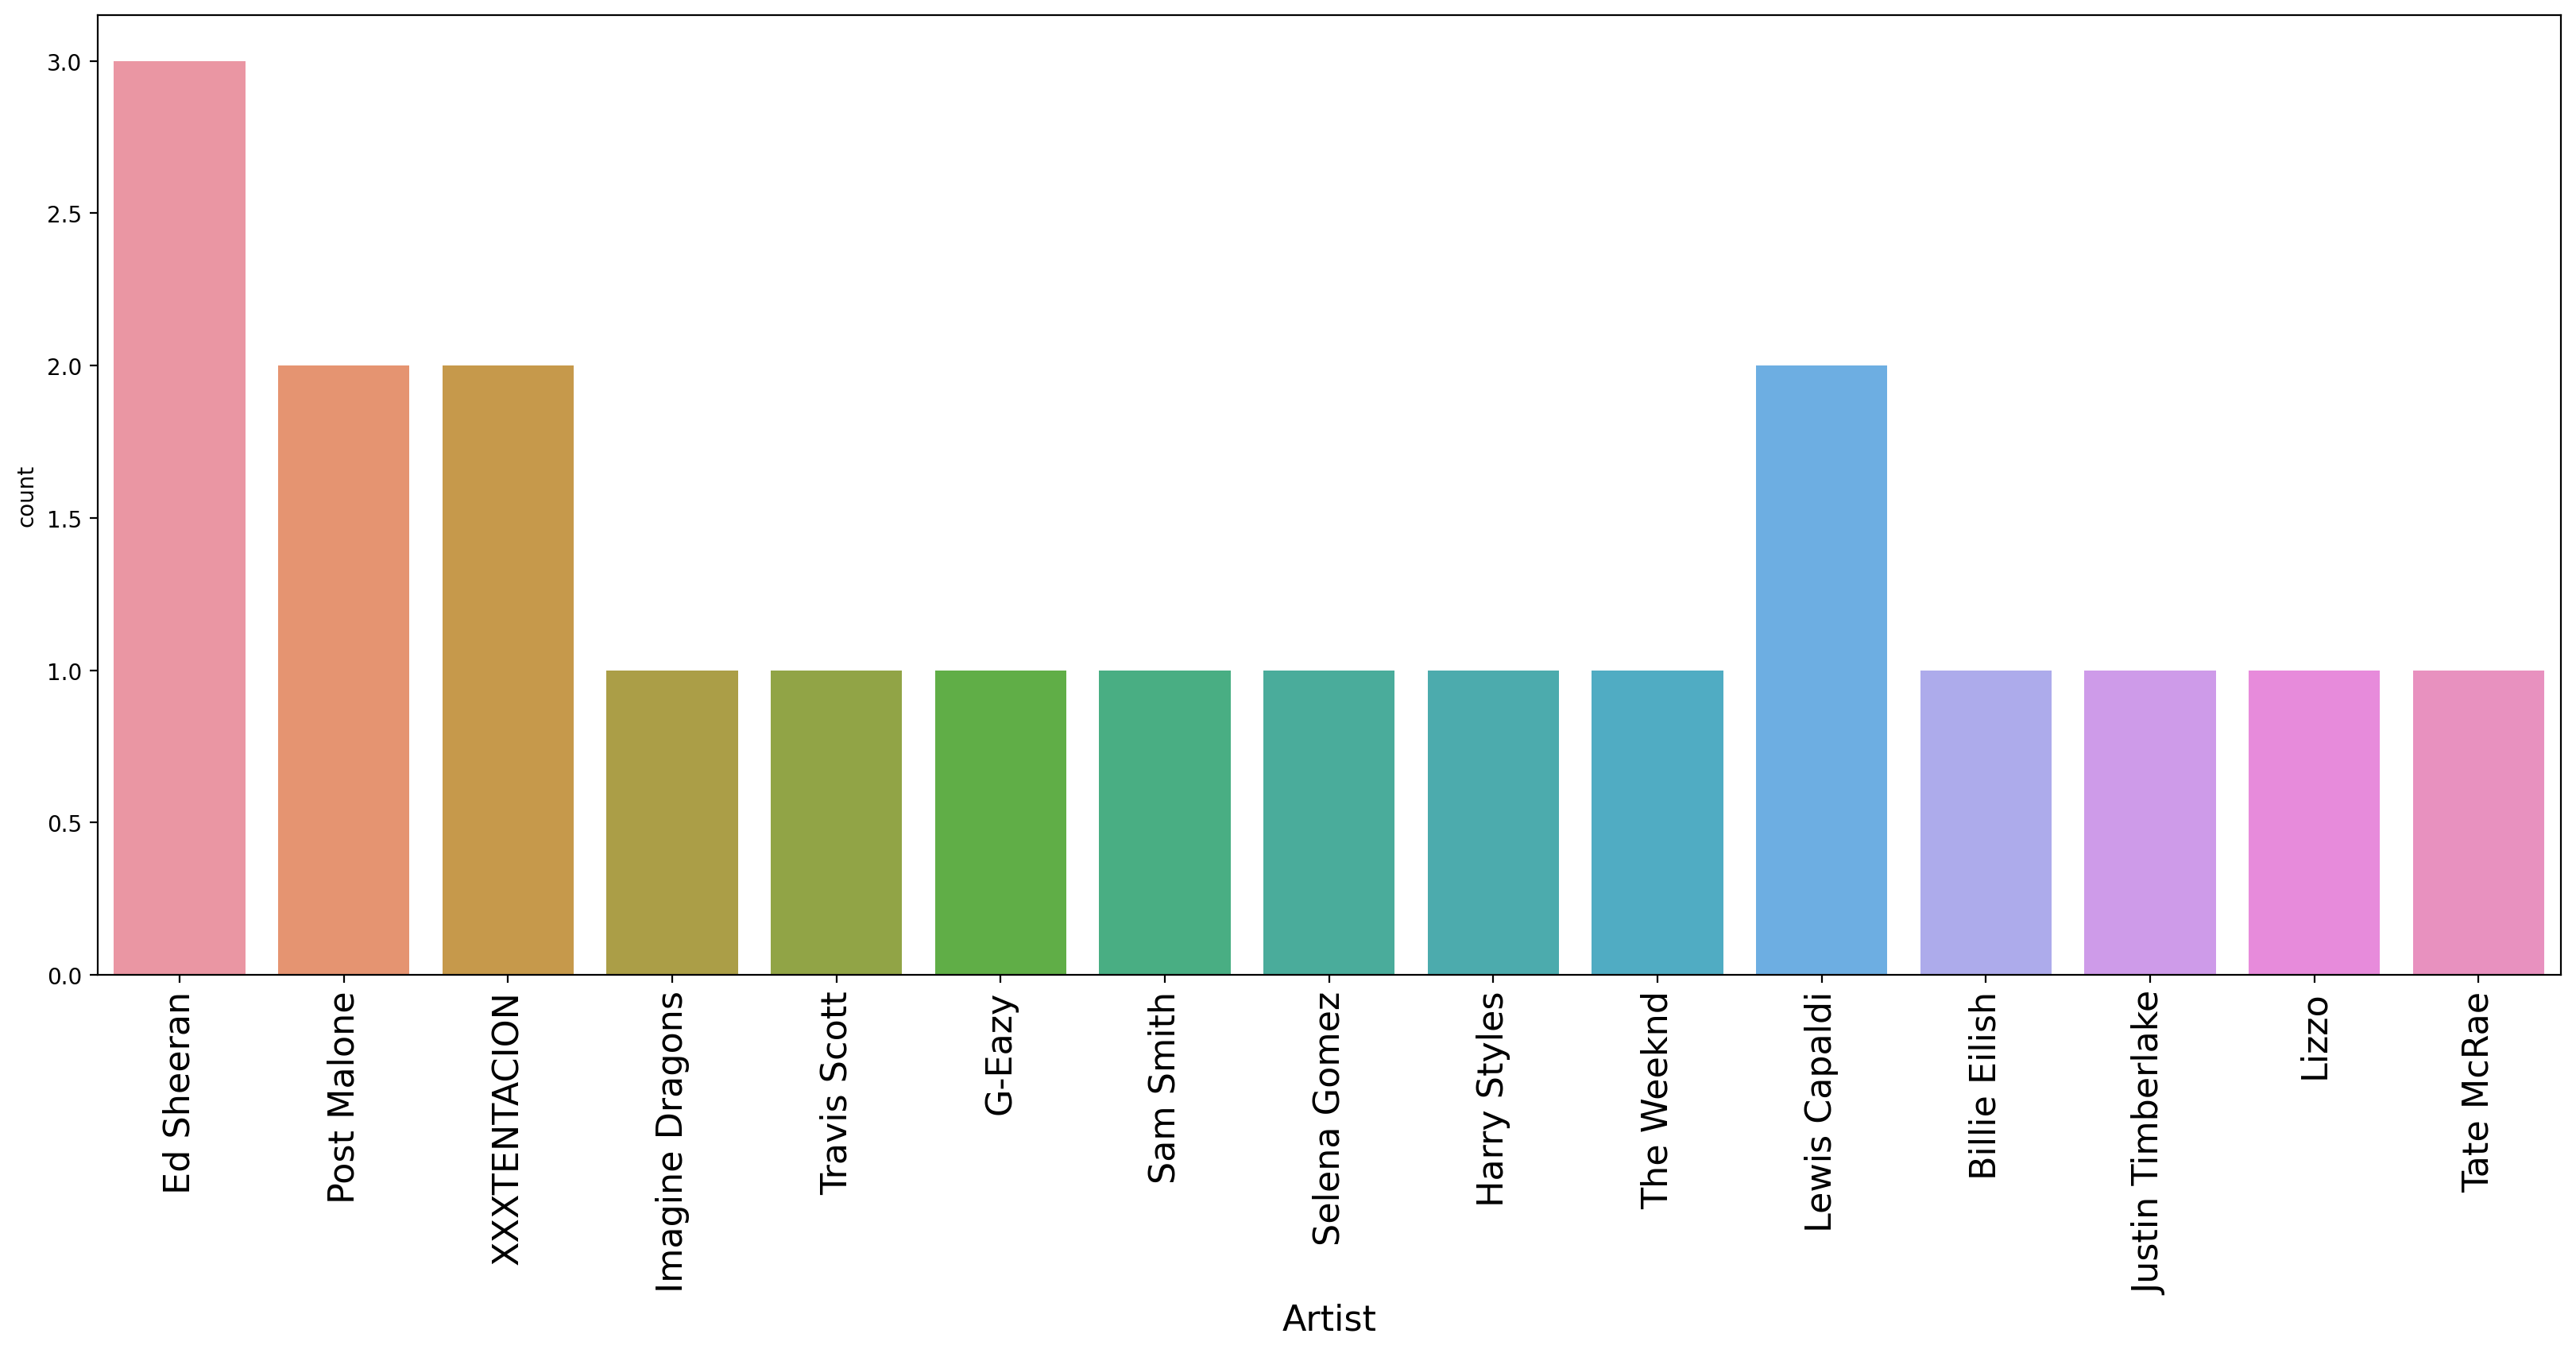

In [81]:
plt.figure(figsize=(20,8),dpi=200)
sns.countplot(data=Daniel_playlist_with_genres,x="artist")
plt.xlabel("Artist",fontsize=16)
plt.xticks(rotation=90,fontsize=16);

# Song years in my playlist

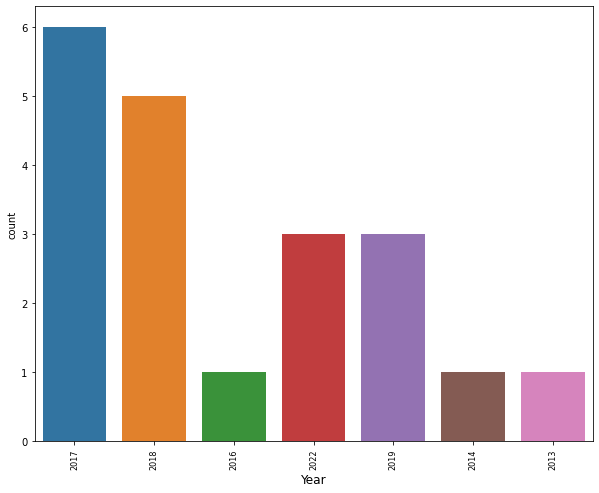

In [82]:
plt.figure(figsize=(10,8))
sns.countplot(data=Daniel_playlist_with_genres,x="year")
plt.xlabel("Year",fontsize=12)
plt.xticks(rotation=90,fontsize=8);

# 2.1) Clustering by Songs Features with K-Means

## Preparing data

In [13]:
Songs_df = pd.read_excel("Spotify Songs.xlsx")
Songs_df = Songs_df.drop("Unnamed: 0",axis=1)

In [14]:
Songs_feat_df = pd.read_excel('Spotify Songs Features.xlsx')
Songs_feat_df = Songs_feat_df.drop(['dur','pop'],axis=1)
Songs_feat_df.head()

,loudness,energy,liveness,valence,acousticness,speechiness
0,-9.211,0.449,0.552,0.357,0.0332,0.1090
1,-6.312,0.448,0.106,0.168,0.1630,0.0232
2,-6.458,0.783,0.083,0.579,0.0470,0.0856
3,-4.333,0.523,0.132,0.394,0.1840,0.0300
4,-6.136,0.520,0.131,0.129,0.1240,0.0712


## Scaling data

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_songs = scaler.fit_transform(Songs_feat_df)

# Dimensionality Reduction

[0.38635843 0.17546799 0.16441086 0.14506203 0.08632347 0.0423772 ]


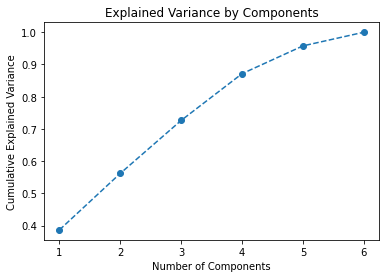

In [16]:
from sklearn.decomposition import PCA
pca = PCA()
reduced_df = pca.fit(scaled_songs)
print(pca.explained_variance_ratio_)
plt.title("Explained Variance by Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.plot(range(1,7), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--');

In [17]:
pca = PCA(3)
reduced_songs_df = pca.fit_transform(scaled_songs)

# Determine the most optimal number of clusters

## Elbow Method

In [18]:
from sklearn.cluster import KMeans

In [19]:
ssd = [] #sum squared distances
for k in range(2,11):
    model = KMeans(n_clusters=k,random_state=101)
    model.fit(reduced_songs_df)
    ssd.append(model.inertia_) #SSD point --> cluster center

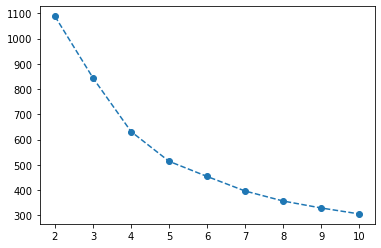

In [20]:
plt.plot(range(2,11),ssd,'o--');

## Elbow Method suggest number of cluster = 4 or cluster = 5

## Silhouette Score

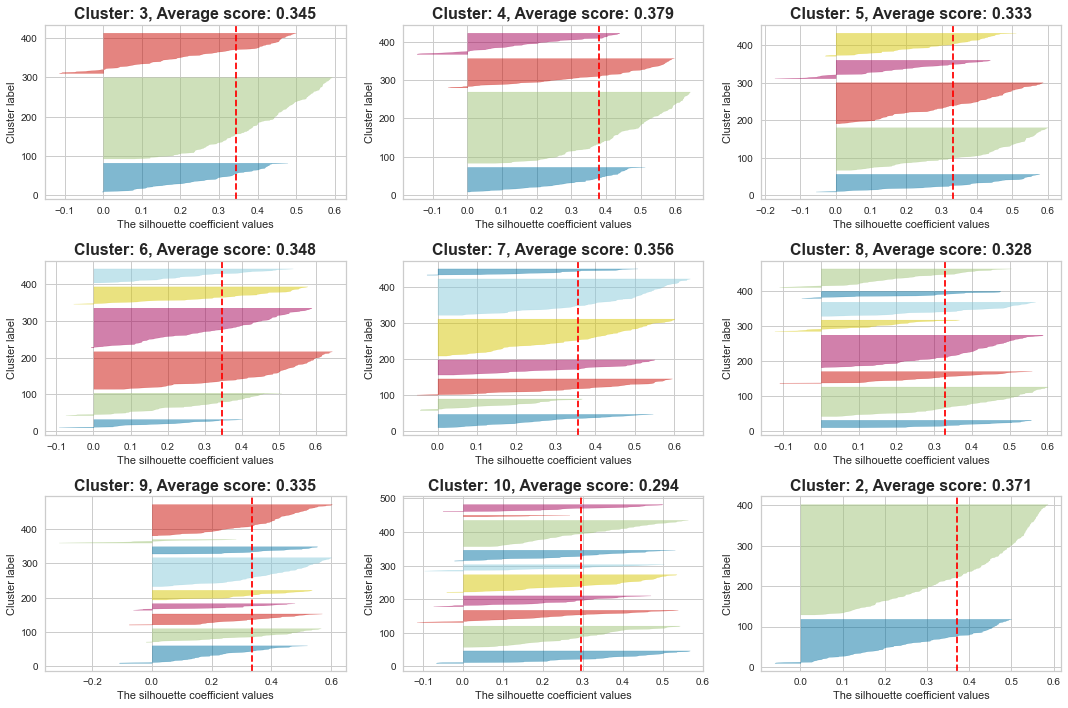

In [21]:
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
fig, ax = plt.subplots(3, 3, figsize=(15,10))

for k in range(2,11):
    model = KMeans(n_clusters=k,random_state=101)
    model.fit(reduced_songs_df)
    silhouette_avg = silhouette_score(reduced_songs_df,model.labels_)
    q, mod = divmod(k, 3)
    visualizer = SilhouetteVisualizer(model, colors='yellowbrick',ax=ax[q-1][mod])
    
    ax[q-1][mod].set_xlabel("The silhouette coefficient values")
    ax[q-1][mod].set_ylabel("Cluster label")
    ax[q-1][mod].set_title(f'Cluster: {k}, Average score: {round(silhouette_avg,3)}',fontsize=16, fontweight='bold')
    visualizer.fit(reduced_songs_df)
    plt.tight_layout()

## Silouhette Score suggest number of cluster = 4

## K Means Visualization

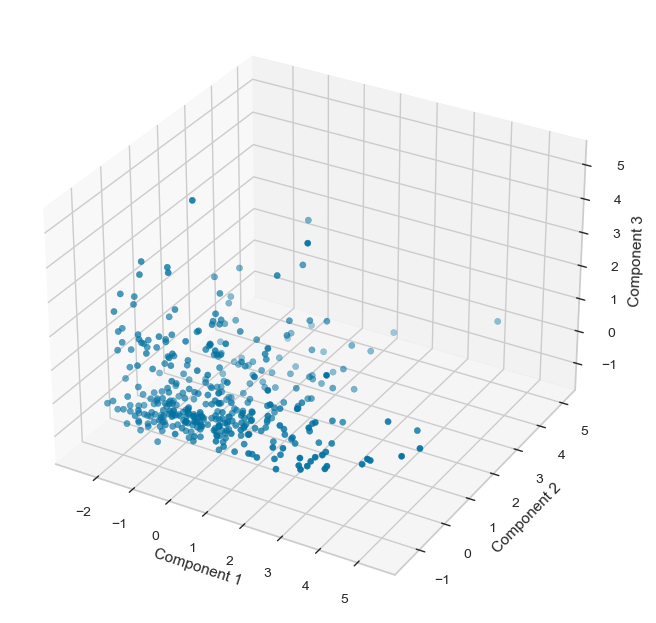

In [22]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,8),dpi=100)
ax = fig.add_subplot(111, projection='3d')
x = reduced_songs_df[:,0]
y = reduced_songs_df[:,1]
z = reduced_songs_df[:,2]

ax.scatter(x, y, z, cmap=plt.hot())
ax.set_xlabel("Component 1")
ax.set_ylabel("Component 2")
ax.set_zlabel("Component 3");

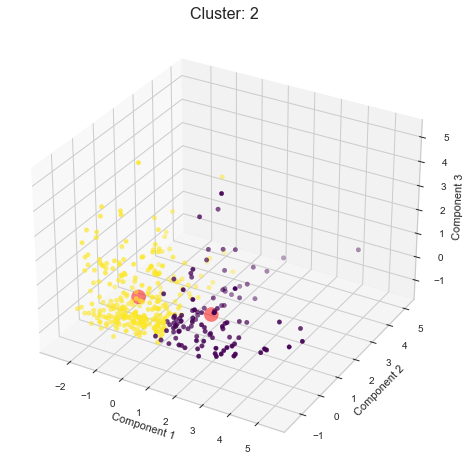

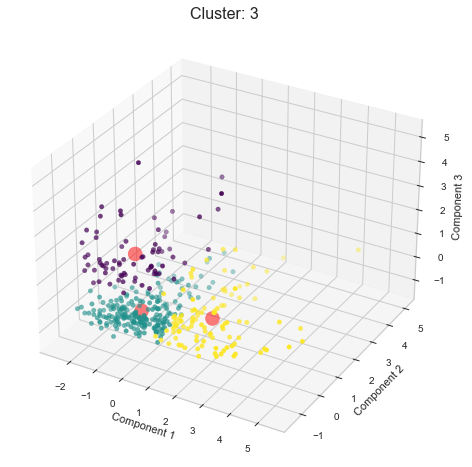

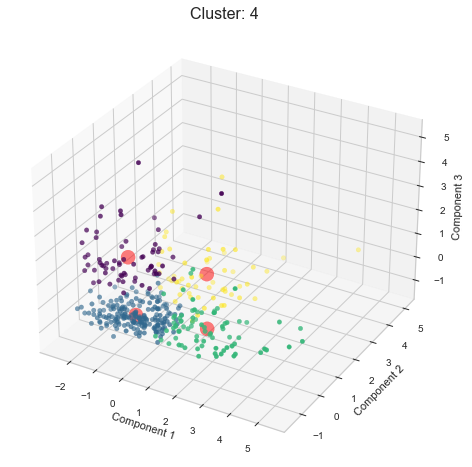

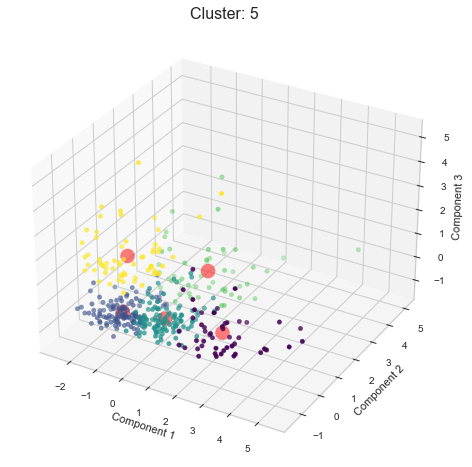

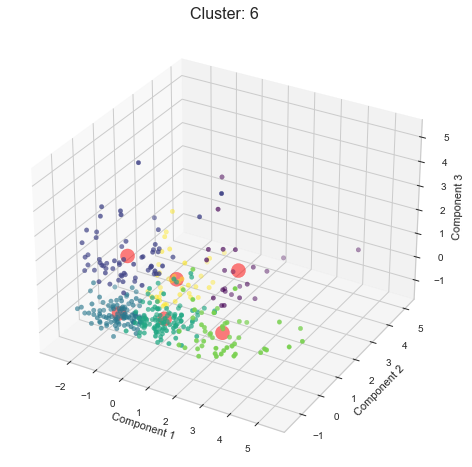

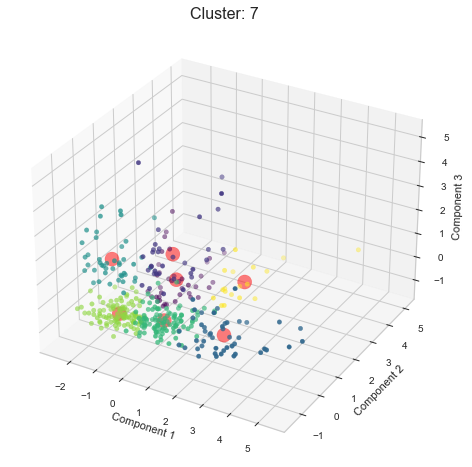

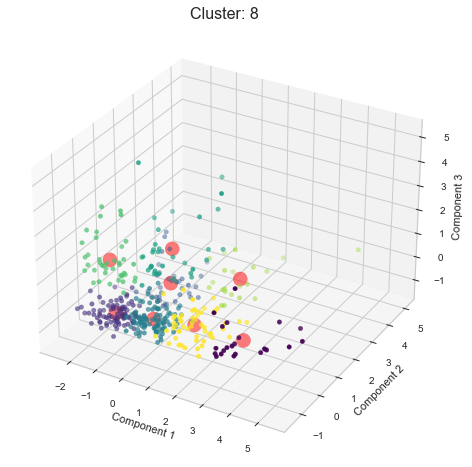

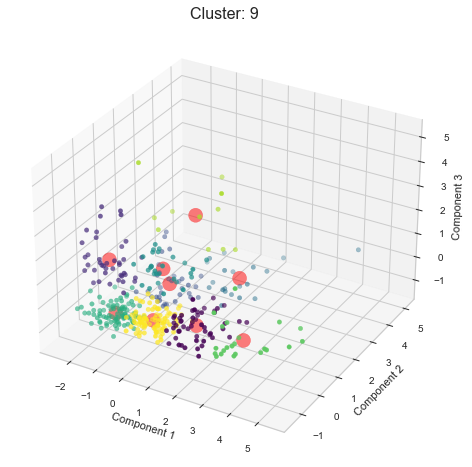

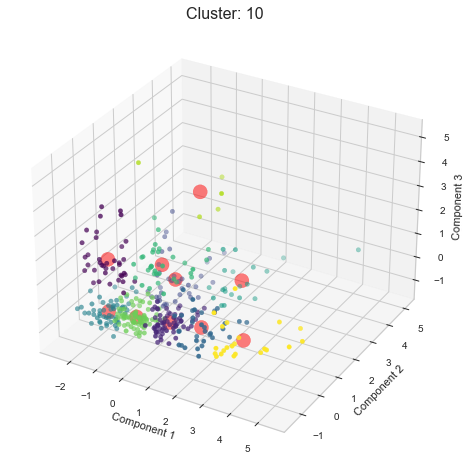

In [25]:
for k in range(2,11):
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111, projection='3d')
    model = KMeans(n_clusters=k,random_state=101)
    model.fit(reduced_songs_df)
    y_kmeans = model.predict(reduced_songs_df)
    x = reduced_songs_df[:,0]
    y = reduced_songs_df[:,1]
    z = reduced_songs_df[:,2]

    ax.scatter(x, y, z, c=y_kmeans, cmap='viridis')
    centers = model.cluster_centers_
    ax.set_xlabel("Component 1")
    ax.set_ylabel("Component 2")
    ax.set_zlabel("Component 3")
    ax.set_title(f'Cluster: {k}',fontsize=16)
    ax.scatter(centers[:, 0], centers[:, 1], centers[:,2], c='red', s=200, alpha=0.5);

## Choose k = 4

In [59]:
model = KMeans(n_clusters=4,random_state=101)

In [60]:
# fit_transform
cluster_labels = model.fit_predict(reduced_songs_df)

In [61]:
Songs_df["Cluster"] = cluster_labels

In [62]:
Songs_feat_df["Cluster"] = cluster_labels

In [63]:
Songs_feat_df.groupby("Cluster").agg("mean")

,loudness,energy,liveness,valence,acousticness,speechiness
Cluster,,,,,,
0,-5.497062,0.714015,0.366154,0.586815,0.151639,0.070148
1,-5.394419,0.692925,0.114024,0.514282,0.134491,0.071602
2,-8.546597,0.426844,0.138032,0.332542,0.552868,0.061314
3,-7.255464,0.593429,0.176400,0.456132,0.156410,0.291804


In [64]:
Songs_df

,title,artist,top genre,year,loudness,energy,liveness,valence,dur,acousticness,speechiness,pop,Cluster
0,God's Plan,Drake,"['canadian hip hop', 'canadian pop', 'hip hop'...",2018,-9.211,0.449,0.5520,0.357,199,0.0332,0.1090,82,0
1,Perfect,Ed Sheeran,"['pop', 'uk pop']",2017,-6.312,0.448,0.1060,0.168,263,0.1630,0.0232,85,2
2,Meant to Be (feat. Florida Georgia Line),Bebe Rexha,"['dance pop', 'electropop', 'pop', 'post-teen ...",2017,-6.458,0.783,0.0830,0.579,164,0.0470,0.0856,75,1
3,Havana (feat. Young Thug),Camila Cabello,"['dance pop', 'pop', 'post-teen pop']",2018,-4.333,0.523,0.1320,0.394,217,0.1840,0.0300,80,1
4,rockstar (feat. 21 Savage),Post Malone,"['dfw rap', 'melodic rap', 'rap']",2018,-6.136,0.520,0.1310,0.129,218,0.1240,0.0712,84,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,In My Mind,Alok,"['electro house', 'pop nacional', 'slap house']",2021,-5.482,0.746,0.2250,0.425,176,0.0947,0.0401,61,1
380,GHOST TOWN,Benson Boone,['pop'],2021,-10.064,0.335,0.1020,0.116,194,0.3890,0.0763,80,2
381,Cure For Me,AURORA,"['art pop', 'norwegian pop']",2021,-5.860,0.764,0.0880,0.416,202,0.0933,0.0554,59,1
382,Paranoia,Daria,['polish pop'],2021,-5.087,0.821,0.0792,0.946,166,0.2820,0.0362,63,1


## Mapping Cluster to Personal Playlist

In [65]:
Daniel_Truong_df = pd.read_excel("Daniel_Spotify_Playlist_Without_Genres.xlsx")

In [66]:
mask  = Songs_df.title.isin(Daniel_Truong_df.title)

In [67]:
Clustered_Daniel_Truong_df = Songs_df[mask]
Clustered_Daniel_Truong_df

,title,artist,top genre,year,loudness,energy,liveness,valence,dur,acousticness,speechiness,pop,Cluster
1,Perfect,Ed Sheeran,"['pop', 'uk pop']",2017,-6.312,0.448,0.1060,0.168,263,0.16300,0.0232,85,2
4,rockstar (feat. 21 Savage),Post Malone,"['dfw rap', 'melodic rap', 'rap']",2018,-6.136,0.520,0.1310,0.129,218,0.12400,0.0712,84,1
16,SAD!,XXXTENTACION,"['emo rap', 'miami hip hop']",2018,-4.880,0.613,0.1230,0.473,167,0.25800,0.1450,83,1
21,Thunder,Imagine Dragons,"['modern rock', 'rock']",2017,-4.833,0.822,0.1470,0.288,187,0.00671,0.0438,83,1
38,I Fall Apart,Post Malone,"['dfw rap', 'melodic rap', 'rap']",2016,-5.408,0.538,0.1960,0.291,223,0.06890,0.0382,79,1
41,SICKO MODE,Travis Scott,"['hip hop', 'rap', 'slap house']",2018,-3.714,0.730,0.1240,0.446,313,0.00513,0.2220,82,1
44,Him & I (with Halsey),G-Eazy,"['indie pop rap', 'oakland hip hop', 'pop', 'p...",2017,-6.343,0.731,0.3080,0.191,269,0.05340,0.0868,76,0
48,Too Good At Goodbyes,Sam Smith,"['dance pop', 'pop', 'uk pop']",2017,-8.237,0.372,0.1690,0.476,201,0.64000,0.0432,73,2
59,Wolves,Selena Gomez,"['dance pop', 'pop', 'post-teen pop']",2017,-4.614,0.804,0.2040,0.306,198,0.12400,0.0448,79,1
70,Shape of You,Ed Sheeran,"['pop', 'uk pop']",2017,-3.183,0.652,0.0931,0.931,234,0.58100,0.0802,85,1


## Filter out songs datasets based on user clustered songs

In [68]:
masked_songs = Songs_df.Cluster.isin(Clustered_Daniel_Truong_df.Cluster)

In [69]:
filtered_songs = Songs_df[masked_songs]
filtered_songs

,title,artist,top genre,year,loudness,energy,liveness,valence,dur,acousticness,speechiness,pop,Cluster
0,God's Plan,Drake,"['canadian hip hop', 'canadian pop', 'hip hop'...",2018,-9.211,0.449,0.5520,0.357,199,0.0332,0.1090,82,0
1,Perfect,Ed Sheeran,"['pop', 'uk pop']",2017,-6.312,0.448,0.1060,0.168,263,0.1630,0.0232,85,2
2,Meant to Be (feat. Florida Georgia Line),Bebe Rexha,"['dance pop', 'electropop', 'pop', 'post-teen ...",2017,-6.458,0.783,0.0830,0.579,164,0.0470,0.0856,75,1
3,Havana (feat. Young Thug),Camila Cabello,"['dance pop', 'pop', 'post-teen pop']",2018,-4.333,0.523,0.1320,0.394,217,0.1840,0.0300,80,1
4,rockstar (feat. 21 Savage),Post Malone,"['dfw rap', 'melodic rap', 'rap']",2018,-6.136,0.520,0.1310,0.129,218,0.1240,0.0712,84,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,In My Mind,Alok,"['electro house', 'pop nacional', 'slap house']",2021,-5.482,0.746,0.2250,0.425,176,0.0947,0.0401,61,1
380,GHOST TOWN,Benson Boone,['pop'],2021,-10.064,0.335,0.1020,0.116,194,0.3890,0.0763,80,2
381,Cure For Me,AURORA,"['art pop', 'norwegian pop']",2021,-5.860,0.764,0.0880,0.416,202,0.0933,0.0554,59,1
382,Paranoia,Daria,['polish pop'],2021,-5.087,0.821,0.0792,0.946,166,0.2820,0.0362,63,1


# 2.2) Content-based Filtering by Genres

## One-Hot Encoding Filtered Songs

In [86]:
def prep_one_hot_encoding(df):
    df['top genre'] = df['top genre'].str.replace("'","")
    df['top genre'] = df['top genre'].str.replace("[","")
    df['top genre'] = df['top genre'].str.replace("]","")
    return df

def one_hot_encoding(df):
    for index, row in df.iterrows():
        arr = row['top genre'].split(',')
        for genre in arr:
            df.at[index,genre] = 1
    return df

def fill_values(df):
    df = df.fillna(0)
    cols_to_drop = ['title','artist','top genre','year','loudness','energy','liveness','valence','dur','acousticness','speechiness','pop','Cluster']
    df = df.drop(cols_to_drop,axis=1)
    return df

In [ ]:
filtered_songs_with_genres = filtered_songs.copy(deep=True)
prep_one_hot_encoding(filtered_songs_with_genres)

In [ ]:
one_hot_encoding(filtered_songs_with_genres)

In [93]:
filtered_songs_with_genres = fill_values(filtered_songs_with_genres)

In [95]:
filtered_songs_with_genres['song id'] = filtered_songs.index

In [108]:
filtered_songs_with_genres.to_excel('Spotify_Songs_Genres.xlsx',sheet_name='ML Project',index=False)

In [97]:
filtered_songs_with_genres

,canadian hip hop,canadian pop,hip hop,rap,toronto rap,uk pop,dance pop,electropop,pop,post-teen pop,...,belgian edm,romanian house,romanian pop,edm,uk hip hop,electro house,norwegian pop,polish pop,scandipop,song id
0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,379
380,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,380
381,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,381
382,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,382


## One-Hot-Encoding User Songs (Learn user profile)

In [98]:
Daniel_songs_with_genres = Clustered_Daniel_Truong_df.copy(deep = True)

In [ ]:
prep_one_hot_encoding(Daniel_songs_with_genres)

In [ ]:
one_hot_encoding(Daniel_songs_with_genres)

In [102]:
Daniel_songs_with_genres = fill_values(Daniel_songs_with_genres)

In [103]:
Daniel_songs_with_genres['song id'] = Daniel_songs_with_genres.index

In [127]:
Daniel_songs_with_genres.to_excel('Daniel_Songs_Genres.xlsx',sheet_name='ML Project',index=False)

## Build User Profile

In [129]:
Daniel_genres = pd.read_excel("Daniel_Songs_Genres.xlsx")

In [130]:
Daniel_genres.columns

Index([' uk pop', 'dfw rap', ' melodic rap', ' rap', 'emo rap',
       ' miami hip hop', 'modern rock', ' rock', 'hip hop', ' slap house',
       'indie pop rap', ' oakland hip hop', ' pop', ' pop rap', 'dance pop',
       ' post-teen pop', 'canadian contemporary r&b', ' canadian pop',
       'art pop', ' electropop', ' escape room', ' minnesota hip hop',
       ' trap queen', 'song id'],
      dtype='object')

In [131]:
Daniel_profile = pd.DataFrame()
Daniel_genres = Daniel_genres.drop('song id',axis = 1)
for (columnName, columnData) in Daniel_genres.iteritems():
    genre = columnName
    Daniel_profile[genre] = [columnData.sum()]

In [132]:
Daniel_profile_built = Daniel_profile.sum().astype(float) #Get categories score for user

In [133]:
Daniel_profile_built.sort_values(ascending=False)

 pop                         7.0
 uk pop                      6.0
 rap                         4.0
dance pop                    4.0
 melodic rap                 2.0
emo rap                      2.0
 miami hip hop               2.0
dfw rap                      2.0
 post-teen pop               1.0
 minnesota hip hop           1.0
 escape room                 1.0
 electropop                  1.0
art pop                      1.0
 canadian pop                1.0
canadian contemporary r&b    1.0
 oakland hip hop             1.0
 pop rap                     1.0
indie pop rap                1.0
 slap house                  1.0
hip hop                      1.0
 rock                        1.0
modern rock                  1.0
 trap queen                  1.0
dtype: float64

In [134]:
Daniel_profile_built.sum()

44.0

In [135]:
Daniel_profile_built.index

Index([' uk pop', 'dfw rap', ' melodic rap', ' rap', 'emo rap',
       ' miami hip hop', 'modern rock', ' rock', 'hip hop', ' slap house',
       'indie pop rap', ' oakland hip hop', ' pop', ' pop rap', 'dance pop',
       ' post-teen pop', 'canadian contemporary r&b', ' canadian pop',
       'art pop', ' electropop', ' escape room', ' minnesota hip hop',
       ' trap queen'],
      dtype='object')

# Recommendation Table

In [136]:
Songs_genre = pd.read_excel("Spotify_Songs_Genres.xlsx")

In [137]:
Songs_genre

,canadian hip hop,canadian pop,hip hop,rap,toronto rap,uk pop,dance pop,electropop,pop,post-teen pop,...,belgian edm,romanian house,romanian pop,edm,uk hip hop,electro house,norwegian pop,polish pop,scandipop,song id
0,1,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,2
3,0,0,0,0,0,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,3
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,379
324,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,380
325,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,381
326,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,382


In [ ]:
Songs_genre_fin = Songs_genre[Daniel_profile_built.index]
Songs_genre_fin['song id'] = Songs_genre['song id']

In [139]:
Songs_genre_fin =  Songs_genre_fin.set_index('song id')

In [140]:
Songs_genre_fin

,uk pop,dfw rap,melodic rap,rap,emo rap,miami hip hop,modern rock,rock,hip hop,slap house,...,pop rap,dance pop,post-teen pop,canadian contemporary r&b,canadian pop,art pop,electropop,escape room,minnesota hip hop,trap queen
song id,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
4,0,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
380,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
381,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [141]:
song_recommendation = (Songs_genre_fin.dot(Daniel_profile_built)) / Daniel_profile_built.sum() #Dot product to calculate between vectors

In [142]:
song_recommendation = song_recommendation.sort_values(ascending=False)
song_recommendation

song id
255    0.409091
206    0.409091
202    0.409091
15     0.386364
249    0.386364
         ...   
216    0.000000
219    0.000000
220    0.000000
221    0.000000
383    0.000000
Length: 328, dtype: float64

# 3) Result

In [143]:
top_20 = song_recommendation.index[:20].tolist()

In [144]:
recommend_playlist = filtered_songs.loc[top_20, :]

In [150]:
recommend_playlist

,title,artist,top genre,year,loudness,energy,liveness,valence,dur,acousticness,speechiness,pop,Cluster
255,Not a Pop Song,Little Mix,"['dance pop', 'girl group', 'pop', 'post-teen ...",2020,-4.715,0.651,0.0782,0.355,179,0.27900,0.0372,56,1
206,Our Song,Anne-Marie,"['dance pop', 'pop', 'pop dance', 'post-teen p...",2021,-4.245,0.759,0.1720,0.515,164,0.14100,0.0423,69,1
202,Kiss My (Uh Oh),Anne-Marie,"['dance pop', 'pop', 'pop dance', 'post-teen p...",2021,-3.639,0.878,0.3080,0.481,177,0.01510,0.0484,52,0
15,New Rules,Dua Lipa,"['dance pop', 'pop', 'uk pop']",2017,-6.021,0.700,0.1530,0.608,209,0.00261,0.0694,80,1
249,Black Hole,Griff,"['dance pop', 'pop', 'tropical house', 'uk pop']",2021,-5.641,0.640,0.0981,0.658,201,0.14200,0.0591,65,1
103,Don't Start Now,Dua Lipa,"['dance pop', 'pop', 'uk pop']",2019,-4.521,0.793,0.0952,0.677,183,0.01250,0.0842,80,1
226,Let’s Go Home Together,Ella Henderson,"['dance pop', 'pop', 'pop dance', 'talent show...",2021,-4.438,0.486,0.0994,0.309,209,0.45400,0.0431,61,2
222,Last Time,Becky Hill,"['dance pop', 'edm', 'pop', 'pop dance', 'pop ...",2021,-2.421,0.794,0.1060,0.754,215,0.30500,0.0699,60,1
214,My Heart Goes (La Di Da) (feat. Topic),Becky Hill,"['dance pop', 'edm', 'pop', 'pop dance', 'pop ...",2021,-5.578,0.781,0.2950,0.456,149,0.01850,0.0452,77,0
131,Break My Heart,Dua Lipa,"['dance pop', 'pop', 'uk pop']",2020,-3.434,0.729,0.3490,0.467,222,0.16700,0.0884,9,0


In [151]:
recommend_playlist.to_excel('Recommended_Playlist.xlsx',sheet_name='Sheet 1',index=False)

# Changing order of the playlist:

In [146]:
Daniel_Truong_df = pd.read_excel("Daniel_Spotify_Playlist_Without_Genres.xlsx")

In [147]:
from sklearn.utils import shuffle
Daniel_Truong_shuffled_df = shuffle(Daniel_Truong_df)
Daniel_Truong_shuffled_df

,title,artist,top genre,year,loudness,energy,liveness,valence,dur,acousticness,speechiness,pop
10,Shape of You,Ed Sheeran,"['pop', 'uk pop']",2017,-3.183,0.652,0.0931,0.931,234,0.58100,0.0802,85
5,SICKO MODE,Travis Scott,"['hip hop', 'rap', 'slap house']",2018,-3.714,0.730,0.1240,0.446,313,0.00513,0.2220,82
1,rockstar (feat. 21 Savage),Post Malone,"['dfw rap', 'melodic rap', 'rap']",2018,-6.136,0.520,0.1310,0.129,218,0.12400,0.0712,84
17,Mirrors,Justin Timberlake,"['dance pop', 'pop']",2013,-6.664,0.512,0.0946,0.512,484,0.23400,0.0503,78
0,Perfect,Ed Sheeran,"['pop', 'uk pop']",2017,-6.312,0.448,0.1060,0.168,263,0.16300,0.0232,85
3,Thunder,Imagine Dragons,"['modern rock', 'rock']",2017,-4.833,0.822,0.1470,0.288,187,0.00671,0.0438,83
9,As It Was,Harry Styles,['pop'],2022,-5.338,0.731,0.3110,0.662,167,0.34200,0.0557,100
11,Call Out My Name,The Weeknd,"['canadian contemporary r&b', 'canadian pop', ...",2018,-4.954,0.593,0.3070,0.175,228,0.17000,0.0356,81
6,Him & I (with Halsey),G-Eazy,"['indie pop rap', 'oakland hip hop', 'pop', 'p...",2017,-6.343,0.731,0.3080,0.191,269,0.05340,0.0868,76
2,SAD!,XXXTENTACION,"['emo rap', 'miami hip hop']",2018,-4.880,0.613,0.1230,0.473,167,0.25800,0.1450,83


In [148]:
mask_shuffled = Songs_df.title.isin(Daniel_Truong_shuffled_df.title)

In [149]:
Clustered_Daniel_Truong_shuffled_df = Songs_df[mask_shuffled]
Clustered_Daniel_Truong_shuffled_df

,title,artist,top genre,year,loudness,energy,liveness,valence,dur,acousticness,speechiness,pop,Cluster
1,Perfect,Ed Sheeran,"['pop', 'uk pop']",2017,-6.312,0.448,0.1060,0.168,263,0.16300,0.0232,85,2
4,rockstar (feat. 21 Savage),Post Malone,"['dfw rap', 'melodic rap', 'rap']",2018,-6.136,0.520,0.1310,0.129,218,0.12400,0.0712,84,1
16,SAD!,XXXTENTACION,"['emo rap', 'miami hip hop']",2018,-4.880,0.613,0.1230,0.473,167,0.25800,0.1450,83,1
21,Thunder,Imagine Dragons,"['modern rock', 'rock']",2017,-4.833,0.822,0.1470,0.288,187,0.00671,0.0438,83,1
38,I Fall Apart,Post Malone,"['dfw rap', 'melodic rap', 'rap']",2016,-5.408,0.538,0.1960,0.291,223,0.06890,0.0382,79,1
41,SICKO MODE,Travis Scott,"['hip hop', 'rap', 'slap house']",2018,-3.714,0.730,0.1240,0.446,313,0.00513,0.2220,82,1
44,Him & I (with Halsey),G-Eazy,"['indie pop rap', 'oakland hip hop', 'pop', 'p...",2017,-6.343,0.731,0.3080,0.191,269,0.05340,0.0868,76,0
48,Too Good At Goodbyes,Sam Smith,"['dance pop', 'pop', 'uk pop']",2017,-8.237,0.372,0.1690,0.476,201,0.64000,0.0432,73,2
59,Wolves,Selena Gomez,"['dance pop', 'pop', 'post-teen pop']",2017,-4.614,0.804,0.2040,0.306,198,0.12400,0.0448,79,1
70,Shape of You,Ed Sheeran,"['pop', 'uk pop']",2017,-3.183,0.652,0.0931,0.931,234,0.58100,0.0802,85,1


> Same order as Clustered_Daniel_Truong_df 

## Conclusion: Changing the order of songs from the user playlist won't affect the result since it'll re-order to a specific order after mapping the songs dataframe to the user playlist

# 4) Comparing personal playlist with recommended playlist

In [134]:
personal_playlist_with_genres = pd.read_excel("Daniel_Songs_Genres.xlsx")
recommended_playlist = pd.read_excel("Recommended_Playlist.xlsx")

In [135]:
recommended_playlist_with_genres = recommended_playlist.copy(deep=True)

In [ ]:
recommended_playlist_with_genres

In [ ]:
recommended_playlist_with_genres

In [138]:
recommended_playlist_with_genres = fill_values(recommended_playlist_with_genres)

## Genres:

### Recommended Playlist Genres:

In [145]:
recommended_playlist_with_genres.sum().sort_values(ascending=False)

 pop                    20.0
dance pop               19.0
 uk pop                 14.0
 tropical house          7.0
 pop dance               6.0
 pop rap                 4.0
 rap                     4.0
 post-teen pop           3.0
 edm                     3.0
 pop house               3.0
 uk dance                3.0
 trap                    2.0
 minnesota hip hop       2.0
 escape room             2.0
 trap queen              2.0
 southern hip hop        2.0
 talent show             2.0
hip hop                  1.0
 melodic rap             1.0
 mississippi hip hop     1.0
 girl group              1.0
 hip hop                 1.0
dtype: float64

### Personal Playlist Genres:

In [ ]:
personal_playlist_with_genres = personal_playlist_with_genres.drop("song id",axis=1)

In [128]:
personal_playlist_with_genres.sum().sort_values(ascending=False)

 pop                         7
 uk pop                      6
 rap                         4
dance pop                    4
 melodic rap                 2
emo rap                      2
 miami hip hop               2
dfw rap                      2
 post-teen pop               1
 minnesota hip hop           1
 escape room                 1
 electropop                  1
art pop                      1
 canadian pop                1
canadian contemporary r&b    1
 oakland hip hop             1
 pop rap                     1
indie pop rap                1
 slap house                  1
hip hop                      1
 rock                        1
modern rock                  1
 trap queen                  1
dtype: int64

## Features Correlation:

In [147]:
personal_playlist_features = pd.read_excel('Daniel_Spotify_Playlist_Without_Genres.xlsx')
recommended_playlist_features = pd.read_excel('Recommended_Playlist.xlsx')

In [152]:
recommended_playlist_features = recommended_playlist_features.drop('Cluster',axis=1)

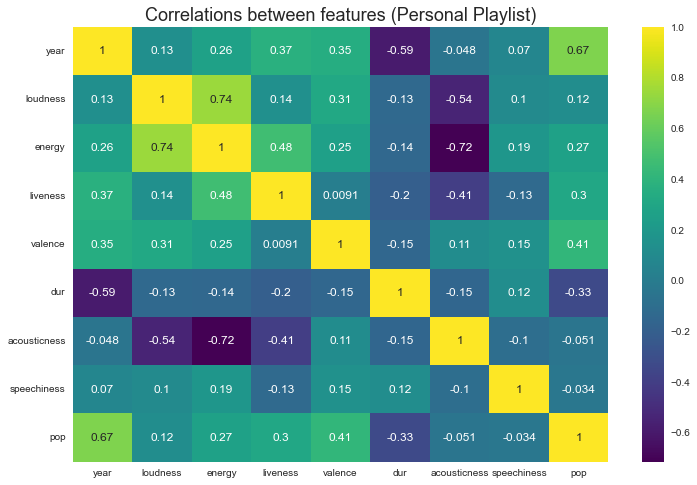

In [153]:
plt.figure(figsize=(12,8))
plt.title("Correlations between features (Personal Playlist)",fontsize=18)
sns.heatmap(personal_playlist_features.corr(),annot=True,cmap="viridis");

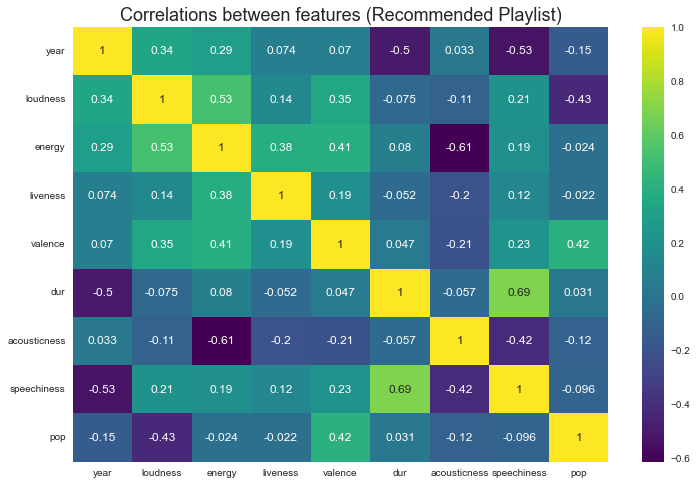

In [154]:
plt.figure(figsize=(12,8))
plt.title("Correlations between features (Recommended Playlist)",fontsize=18)
sns.heatmap(recommended_playlist_features.corr(),annot=True,cmap="viridis");